Lade Dateien aus: ../Data/raw/blaulicht_scraping
✓ Muenchen_blaulicht_scrape_2025-12-18.csv analysiert.
✓ Chemnitz_blaulicht_scrape_2025-12-07.csv analysiert.
✓ Dortmund_blaulicht_scrape_2025-12-07.csv analysiert.
✓ Erfurt_blaulicht_scrape_2025-12-09.csv analysiert.
✓ Nuernberg_blaulicht_scrape_2025-12-09.csv analysiert.
✓ Saarbruecken_blaulicht_scrape_2025-12-09.csv analysiert.

Gefundene Häufigkeiten: {'drogen': 831, 'kokain': 279, 'koks': 2, 'droge': 37, 'mdma': 24, 'methamphetamin': 42, 'methamphetamine': 2}

Erstelle Wordcloud...


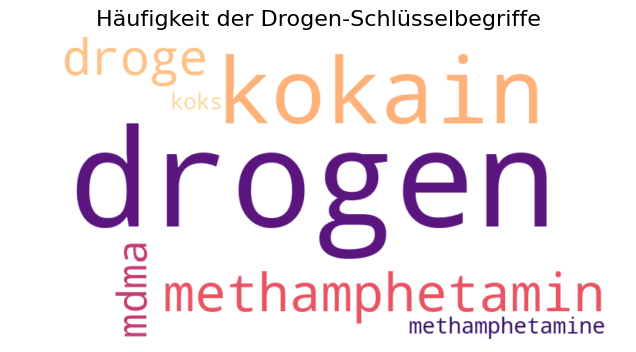

Wordcloud gespeichert als 'drogen_keywords_cloud.png'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import re

#Pfade / datein
pfad_zu_dateien = "../Data/raw/blaulicht_scraping"

dateien = [
    "Muenchen_blaulicht_scrape_2025-12-18.csv",
    "Chemnitz_blaulicht_scrape_2025-12-07.csv",
    "Dortmund_blaulicht_scrape_2025-12-07.csv",
    "Erfurt_blaulicht_scrape_2025-12-09.csv",
    "Nuernberg_blaulicht_scrape_2025-12-09.csv",
    "Saarbruecken_blaulicht_scrape_2025-12-09.csv",
]

#Liste
target_keywords = ['drogen', 'kokain', 'koks', 'droge', 'mdma', 'methamphetamin', 'methamphetamine']

#speichern der Zählungen: {'drogen': 0, 'kokain': 0, ...}
keyword_counts = {k: 0 for k in target_keywords}

print(f"Lade Dateien aus: {pfad_zu_dateien}")

# ZÄHLEN
for filename in dateien:
    voller_pfad = os.path.join(pfad_zu_dateien, filename)
    
    if os.path.exists(voller_pfad):
        try:
            df = pd.read_csv(voller_pfad, on_bad_lines='skip')
            
            # Text kombinieren
            df.columns = [c.lower() for c in df.columns]
            if 'title' in df.columns and 'abstract' in df.columns:
                df['text'] = df['title'].astype(str) + " " + df['abstract'].astype(str)
            else:
                df['text'] = df.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
            
            # Alles in Kleinbuchstaben umwandeln
            full_text = " ".join(df['text'].tolist()).lower()
            
            # Zählen mit Regex
            for keyword in target_keywords:
                # \b sorgt dafür, dass "Drogen" nicht als Treffer für "Droge" zählt
                pattern = r'\b' + re.escape(keyword) + r'\b'
                matches = re.findall(pattern, full_text)
                keyword_counts[keyword] += len(matches)
                
            print(f"✓ {filename} analysiert.")
            
        except Exception as e:
            print(f"Fehler bei {filename}: {e}")
    else:
        print(f"Datei nicht gefunden: {filename}")

# 0-Werte entfernen ist aber sauber
keyword_counts = {k: v for k, v in keyword_counts.items() if v > 0}

print("\nGefundene Häufigkeiten:", keyword_counts)

#WORDCLOUD
if keyword_counts:
    print("\nErstelle Wordcloud...")
    
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        colormap='magma', 
        prefer_horizontal=0.9
    ).generate_from_frequencies(keyword_counts)

    # Plotten
    plt.figure(figsize=(8, 4))
    
    
    plt.imshow(wordcloud.to_image(), interpolation='bilinear')
    
    plt.axis('off')
    plt.title("Häufigkeit der Drogen-Schlüsselbegriffe", fontsize=16)
    
    # Speichern
    plt.savefig('../assets/drogen_keywords_cloud.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Wordcloud gespeichert als 'drogen_keywords_cloud.png'")
else:
    print("Keine der Keywords gefunden.")